<a href="https://colab.research.google.com/github/Ryvcy/ARIMA-implementation/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('Eggs.csv', delimiter=';')


In [ ]:
print(data.head())
print(data.tail())
print(data.shape)
print(data.dtypes)

         date Location commodity    unit  price_UAH  price_USD
0  15.03.2014    Odesa      Eggs  10 pcs       9.52     0.9103
1  15.04.2014    Odesa      Eggs  10 pcs       7.46     0.5771
2  15.09.2014    Odesa      Eggs  10 pcs      11.74     0.9236
3  15.10.2014    Odesa      Eggs  10 pcs      13.10     1.0345
4  15.11.2014    Odesa      Eggs  10 pcs      13.48     0.9659
          date Location commodity    unit  price_UAH  price_USD
68  15.02.2023    Odesa      Eggs  10 pcs      59.75     1.6387
69  15.03.2023    Odesa      Eggs  10 pcs      61.12     1.6765
70  15.05.2023    Odesa      Eggs  10 pcs      38.61     1.0566
71  15.06.2023    Odesa      Eggs  10 pcs      38.38     1.0469
72  15.11.2023    Odesa      Eggs  10 pcs      46.99     1.3040
(73, 6)
date          object
Location      object
commodity     object
unit          object
price_UAH    float64
price_USD    float64
dtype: object


In [ ]:
print(data.columns)


Index(['date', 'Location', 'commodity', 'unit', 'price_UAH', 'price_USD'], dtype='object')


In [ ]:
print(data.describe())

       price_UAH  price_USD
count  73.000000  73.000000
mean   22.594384   0.840077
std    12.642854   0.301176
min     7.460000   0.349200
25%    14.460000   0.616400
50%    19.270000   0.804200
75%    25.390000   0.948100
max    62.190000   1.700600


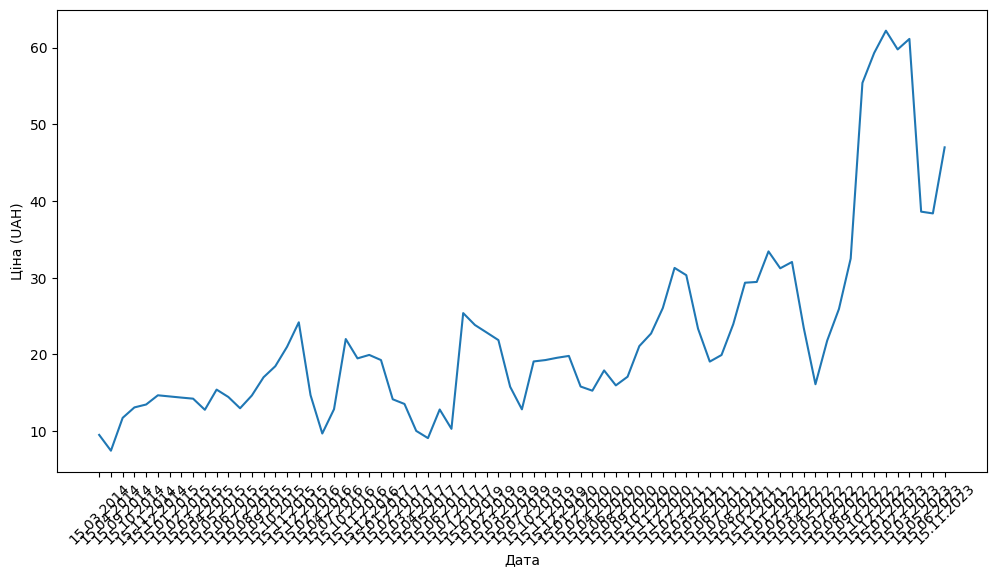

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['price_UAH'])
plt.xlabel('Дата')
plt.ylabel('Ціна (UAH)')
plt.xticks(rotation=45)
plt.show()

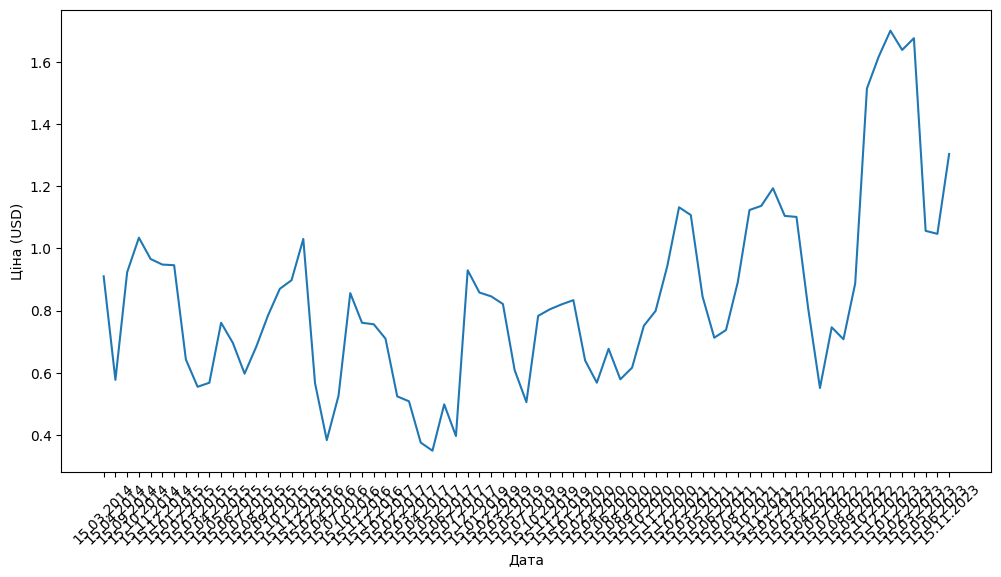

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['price_USD'])
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.xticks(rotation=45)
plt.show()

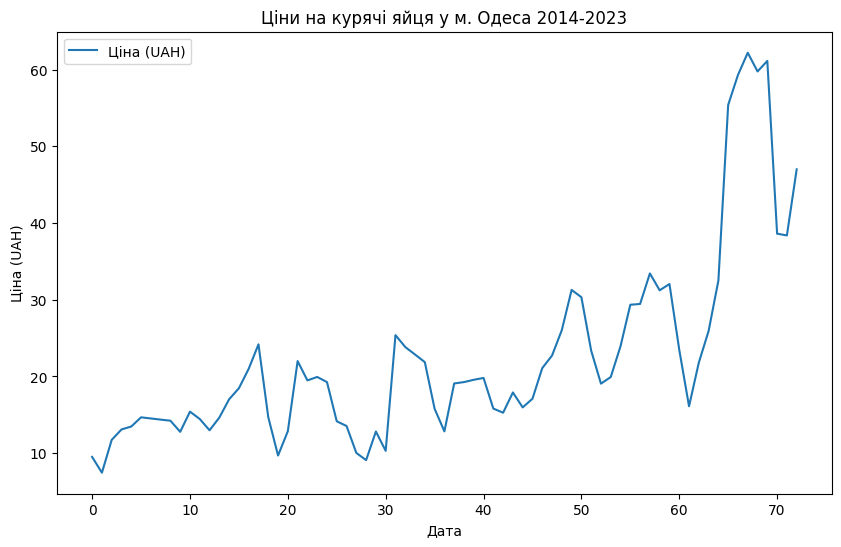

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plt.plot(data['price_UAH'], label='Ціна (UAH)')
plt.title('Ціни на курячі яйця у м. Одеса 2014-2023')
plt.xlabel('Дата')
plt.ylabel('Ціна (UAH)')
plt.legend()
plt.show()


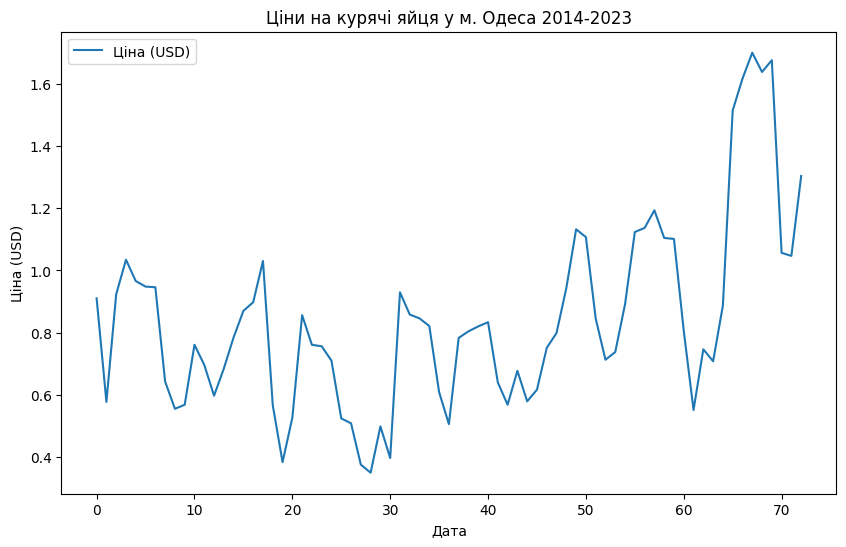

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['price_USD'], label='Ціна (USD)')
plt.title('Ціни на курячі яйця у м. Одеса 2014-2023')
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result_uah = adfuller(data['price_UAH'].dropna())
print('p-value:', result_uah[1])

result_uah = adfuller(data['price_UAH'].diff().dropna())
print('p-value:', result_uah[1])

result_uah = adfuller(data['price_UAH'].diff().diff().dropna())
print('p-value:', result_uah[1])


p-value: 0.99561547642298
p-value: 2.2668084818117797e-10
p-value: 1.4483758740003447e-10


In [ ]:
result_usd = adfuller(data['price_USD'].dropna())
print('p-value:', result_usd[1])

result_usd = adfuller(data['price_USD'].diff().dropna())
print('p-value:', result_usd[1])

result_usd = adfuller(data['price_USD'].diff().diff().dropna())
print('p-value:', result_usd[1])

p-value: 0.9142068978357443
p-value: 7.597728995779474e-10
p-value: 2.6215851574676806e-09


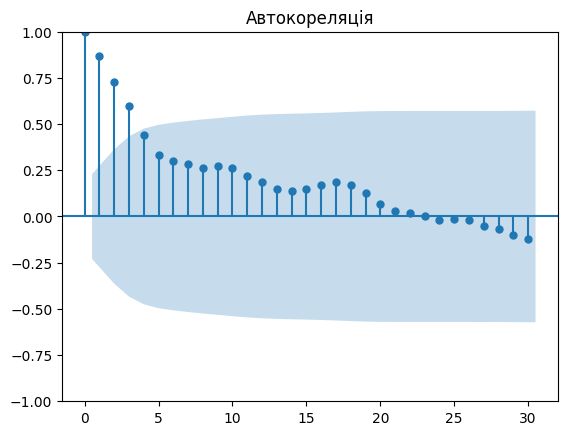

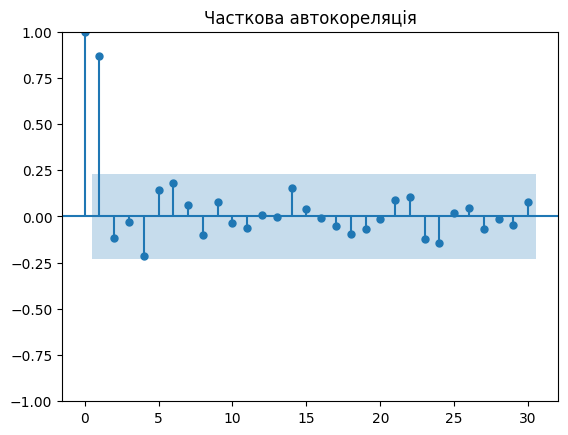

In [ ]:
plot_acf(data['price_UAH'], lags=30)
plt.title('Автокореляція')
plt.show()

plot_pacf(data['price_UAH'], lags=30)
plt.title('Часткова автокореляція')
plt.show()

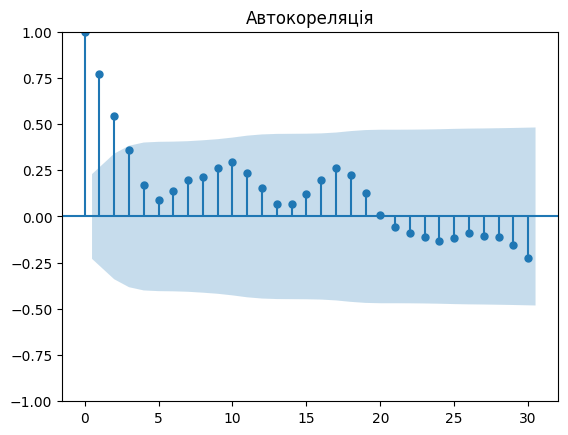

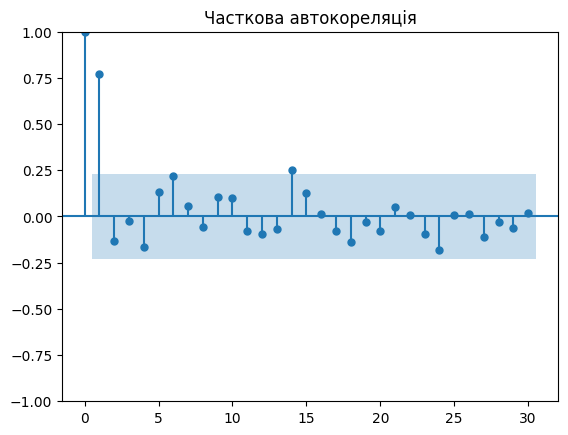

In [ ]:
plot_acf(data['price_USD'], lags=30)
plt.title('Автокореляція')
plt.show()

plot_pacf(data['price_USD'], lags=30)
plt.title('Часткова автокореляція')
plt.show()

In [ ]:

model_uah = ARIMA(data['price_UAH'], order=(2,1,2))
fit_uah = model_uah.fit()

print(fit_uah.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              price_UAH   No. Observations:                   73
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -217.779
Date:                Fri, 08 Mar 2024   AIC                            445.558
Time:                        17:12:47   BIC                            456.941
Sample:                             0   HQIC                           450.090
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4911      0.099     15.057      0.000       1.297       1.685
ar.L2         -0.9798      0.096    -10.167      0.000      -1.169      -0.791
ma.L1         -1.3947      0.204     -6.821      0.0

In [ ]:
model_usd = ARIMA(data['price_USD'], order=(2,1,2))
fit_usd = model_usd.fit()

print(fit_usd.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              price_USD   No. Observations:                   73
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  23.798
Date:                Fri, 08 Mar 2024   AIC                            -37.596
Time:                        17:12:49   BIC                            -26.212
Sample:                             0   HQIC                           -33.064
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6221      0.088     18.526      0.000       1.450       1.794
ar.L2         -0.7924      0.079    -10.068      0.000      -0.947      -0.638
ma.L1         -1.9185      0.461     -4.159      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


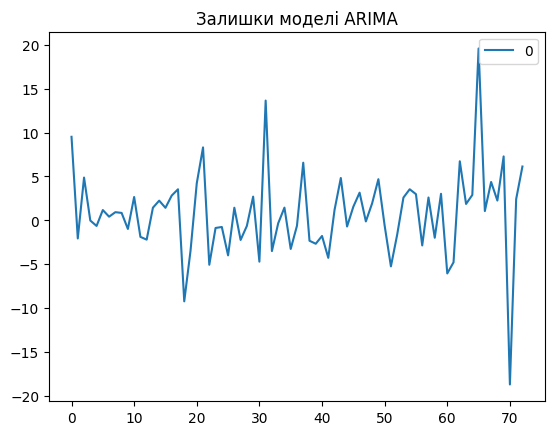

In [ ]:
residuals = pd.DataFrame(fit_uah.resid)
residuals.plot()
plt.title('Залишки моделі ARIMA')
plt.show()

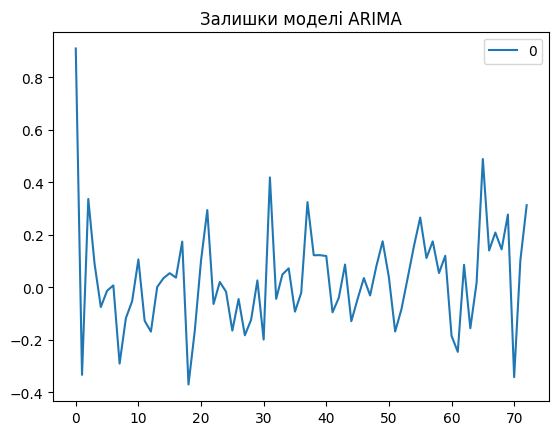

In [ ]:
residuals = pd.DataFrame(fit_usd.resid)
residuals.plot()
plt.title('Залишки моделі ARIMA')
plt.show()

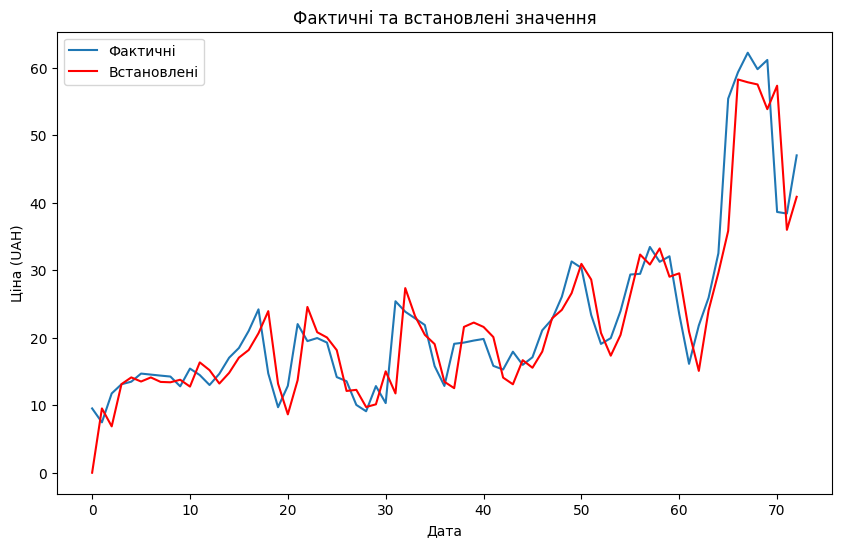

Прогнозовані значення для наступних 12 кроків:
73    53.549438
74    60.099996
75    63.440889
76    62.004511
77    56.589413
78    49.922210
79    45.286200
80    44.905696
81    48.880535
82    55.180270
83    60.679465
84    62.707106
Name: predicted_mean, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['price_UAH'], label='Фактичні')
plt.plot(fit_uah.fittedvalues, color='red', label='Встановлені')
plt.title('Фактичні та встановлені значення')
plt.xlabel('Дата')
plt.ylabel('Ціна (UAH)')
plt.legend()
plt.show()

forecast = fit_uah.forecast(steps=12)
print("Прогнозовані значення для наступних 12 кроків:")
print(forecast)

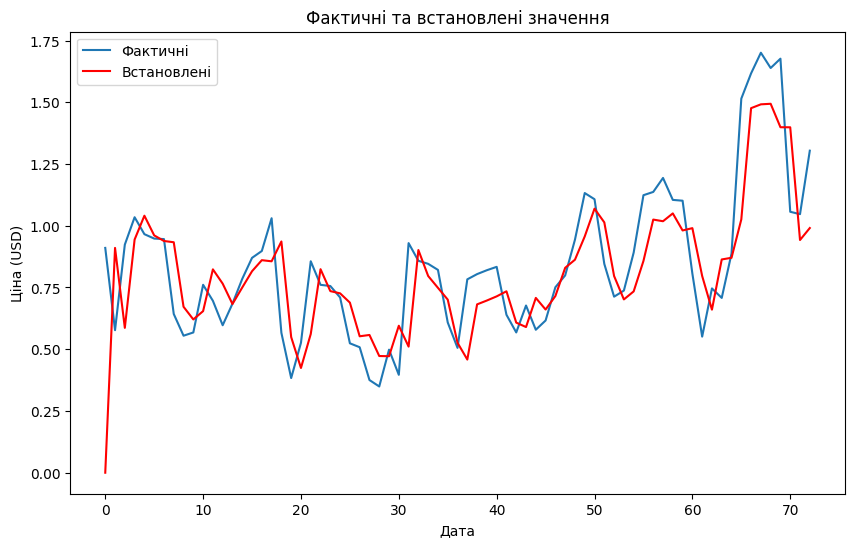

Прогнозовані значення для наступних 12 кроків:
73    1.233330
74    1.219529
75    1.253145
76    1.318608
77    1.398157
78    1.475317
79    1.537440
80    1.577066
81    1.592113
82    1.585121
83    1.561855
84    1.529657
Name: predicted_mean, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['price_USD'], label='Фактичні')
plt.plot(fit_usd.fittedvalues, color='red', label='Встановлені')
plt.title('Фактичні та встановлені значення')
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()
plt.show()

forecast = fit_usd.forecast(steps=12)
print("Прогнозовані значення для наступних 12 кроків:")
print(forecast)